# Simple Linear Regression

In this notebook, we'll build a linear regression model to predict `Sales` using an appropriate predictor variable.

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
# importing libraries
import pandas as pd

In [2]:
#  Reading dataset 
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Inspecting dataset

In [3]:
df.shape

(200, 4)

In [4]:
# checking null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
# summary stats 
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Step 2: Visualising the Data

Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to `Sales`.

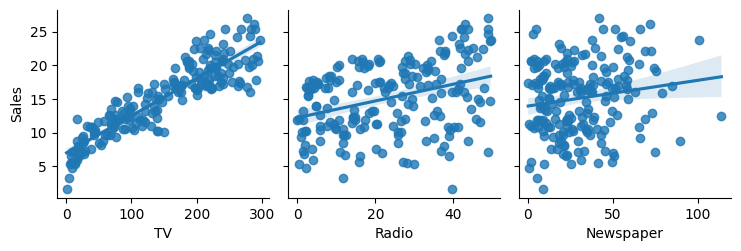

In [6]:
#  plotting pairplots with target variable

import seaborn as sns 
import matplotlib.pyplot as plt
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='reg')
plt.show()

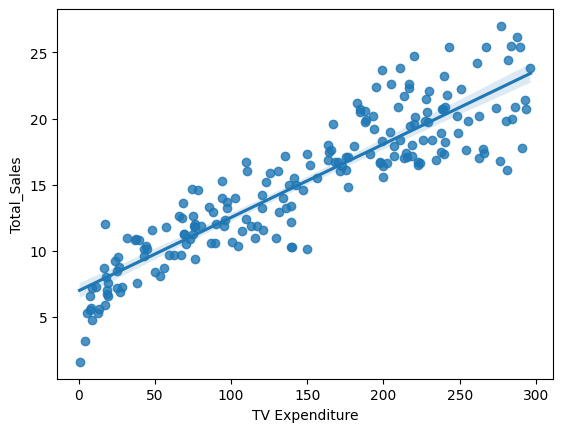

In [7]:
#  regression plot 
sns.regplot(x='TV',y='Sales',data=df)
plt.xlabel('TV Expenditure')
plt.ylabel('Total_Sales')
plt.show()

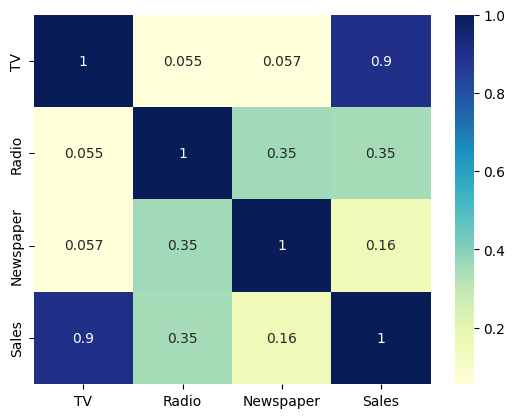

In [8]:
# checking correlation plot 

sns.heatmap(df.corr(), cbar=True, annot=True,cmap='YlGnBu')
plt.show()

As is visible from the pairplot and the heatmap, the variable `TV` seems to be most correlated with `Sales`. So let's go ahead and perform simple linear regression using `TV` as our feature variable.

---
## Step 3: Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

### Generic Steps in model building using `statsmodels`

We first assign the feature variable, `TV`, in this case, to the variable `X` and the response variable, `Sales`, to the variable `y`.

In [9]:
df.sample()

,TV,Radio,Newspaper,Sales
80,76.4,26.7,22.3,11.8


Steps: 
- Create x and y
- Create train and test sets (70-30)
- train your model on the training set (i.e learn the coefficients)
- Evaluate the model on the (training set/test set) 

In [10]:
# creating X and y 
X = df['TV']
y= df['Sales']

#### Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [11]:
# train-test-split 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

#### Building a Linear Model

You first need to import the `statsmodel.api` library using which you'll perform the linear regression.

In [12]:
import statsmodels.api as sm

By default, the `statsmodels` library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the `add_constant` attribute of `statsmodels`. And once you've added the constant to your `X_train` dataset, you can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below

In [13]:
# adding the constant or intercept 
X_train_sm = sm.add_constant(X_train)
X_train_sm



,const,TV
169,1.0,284.3
97,1.0,184.9
31,1.0,112.9
12,1.0,23.8
35,1.0,290.7
...,...,...
106,1.0,25.0
14,1.0,204.1
92,1.0,217.7
179,1.0,165.6


In [14]:
# training the model
sm_lr = sm.OLS(y_train,X_train_sm).fit()

In [15]:
sm_lr.params
# sales = 7.2 + 0.0548 * TV_advertising

const    7.206555
TV       0.054835
dtype: float64

In [16]:
#  Performing a summary operation lists out all the different parameters of the regression line fitted
sm_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     550.7
Date:                Sun, 23 Feb 2025   Prob (F-statistic):           5.08e-50
Time:                        18:45:06   Log-Likelihood:                -314.94
No. Observations:                 140   AIC:                             633.9
Df Residuals:                     138   BIC:                             639.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2066      0.414     17.392      0.000       6.387       8.026
TV             0.0548      0.002     23.467      0.000       0.050       0.059
==============================================================================
Omnibus:                        1.138   Durbin-Watson:                   2.351
Prob(Omnibus):                  0.566   Jarque-Bera (JB):                1.240
Skew:                          -0.190   Prob(JB):                        0.538
Kurtosis:                       2.739   Cond. No.                         376.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

####  Looking at some key statistics from the summary

The values we are concerned with are - 
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

##### 1. The coefficient for TV is 0.054, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance. 

##### 2. R - squared is 0.816
Meaning that 81.6% of the variance in `Sales` is explained by `TV`

This is a decent R-squared value.

##### 3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

---
The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ Sales = 7.2 + 0.054 \times TV $

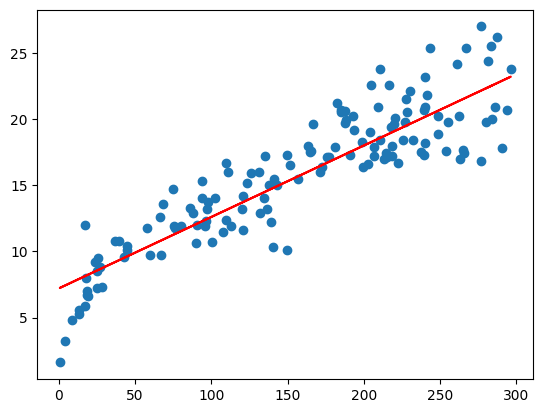

In [17]:
plt.scatter(X_train,y_train)
plt.plot(X_train, 7.2 + 0.054 *X_train,color='red')
plt.show()

## Step 4: Residual analysis 
To validate assumptions of the model, and hence the reliability for inference

#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

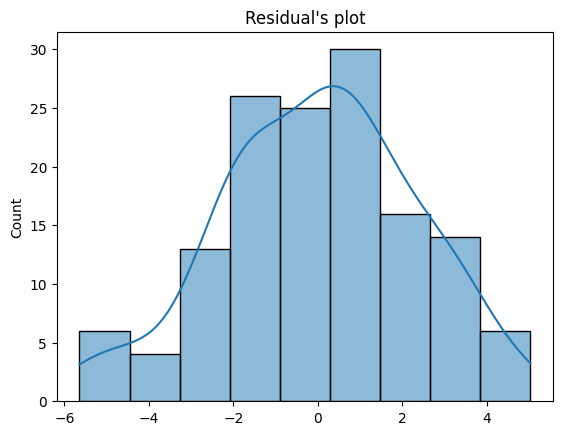

In [18]:
# y_train , y_train_pred 

y_train_pred = sm_lr.predict(X_train_sm)
residuals = y_train - y_train_pred
plt.title("Residual's plot")
sns.histplot(residuals,kde=True)
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

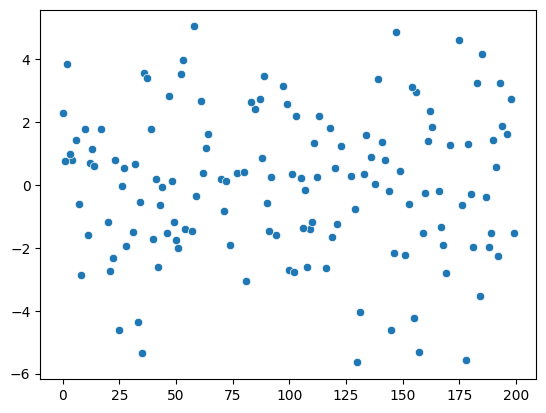

In [19]:
# looking for patterns in the residuals as they should be independent (no patterns should be there)
sns.scatterplot(residuals)
plt.show()

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

## Step 5: Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the `X_test` data like you did for `X_train` and then you can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [20]:
X_test.shape

(60,)

In [21]:
#  add a constant/intercept to add on X_test 
x_test_sm = sm.add_constant(X_test)

# predict the y_test 
y_test_pred = sm_lr.predict(x_test_sm)


##### Checking the R-squared on the test set

In [22]:
# Evaluate the model using R2Score
from sklearn.metrics import r2_score
r_squared = r2_score(y_test,y_test_pred)
r_squared*100

81.4855389208679

##### Looking at the RMSE

In [23]:
# Evaluating using mean squared error
from sklearn.metrics import root_mean_squared_error
mse = root_mean_squared_error(y_test, y_test_pred)
mse

np.float64(2.2758570698017606)

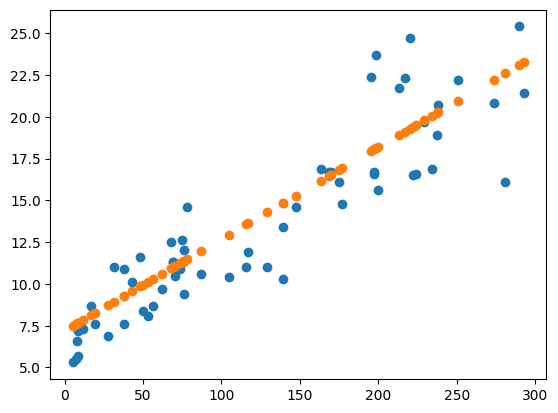

In [24]:
plt.scatter(X_test,y_test)
plt.scatter(X_test,y_test_pred)
plt.show()

### Linear Regression using `linear_model` in `sklearn`

Apart from `statsmodels`, there is another package namely `sklearn` that can be used to perform linear regression. We will use the `linear_model` library from `sklearn` to build the model. Since, we hae already performed a train-test split, we don't need to do it again.

There's one small step that we need to add, though. When there's only a single feature, we need to add an additional column in order for the linear regression fit to be performed successfully.

In [25]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)


In [26]:
X_train_lm.shape

(140,)

In [27]:
X_train_lm = X_train_lm.values.reshape(-1,1)
X_train_lm.shape

(140, 1)

In [28]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train_lm,y_train_lm)

LinearRegression()

In [29]:
#  to see intercept 
LR.intercept_

np.float64(6.948683200001357)

In [30]:
# to see coefficients 
LR.coef_

array([0.05454575])

The equationwe get is the same as what we got before!

$ Sales = 6.948 + 0.054* TV $

Sklearn linear model is useful as it is compatible with a lot of sklearn utilites (cross validation, grid search etc.)

In [31]:
X_test_lm = X_test_lm.values.reshape(-1,1)

In [32]:
# make predictions on test set 
y_test_lr = LR.predict(X_test_lm)

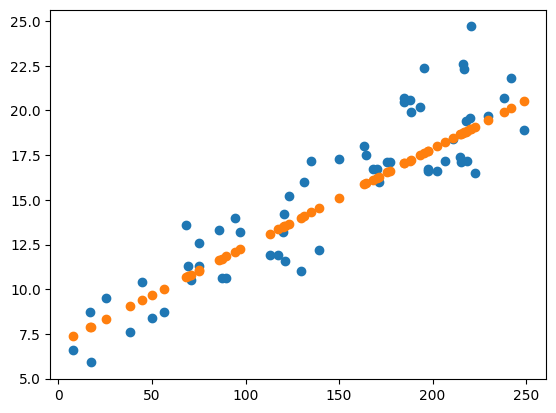

In [33]:
plt.scatter(X_test_lm,y_test_lm)
plt.scatter(X_test_lm, y_test_lr)
plt.show()

Sklearn linear model is useful as it is compatible with a lot of sklearn utilites (cross validation, grid search etc.)

While the true benefits of scaling will be apparent during future modules, at this juncture we can discuss if it has an impact on the model.

We'll rebuild the model after scaling the predictor and see what changes.

The most popular methods for scaling:
1. Min-Max Scaling
2. Standard Scaling

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

#### SciKit Learn has these scaling utilities handy

In [35]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [36]:
# One aspect that you need to take care of is that the 'fit_transform' can be performed on 2D arrays only. So you need to
# reshape your 'X_train_scaled' and 'y_trained_scaled' data in order to perform the standardisation.
X_train_scaled = X_train.values.reshape(-1,1)
y_train_scaled = y_train.values.reshape(-1,1)

In [37]:
X_train_scaled.shape

(140, 1)

In [38]:
# Create a scaler object using StandardScaler()
scaler = StandardScaler()
#'Fit' and transform the train set; and transform using the fit on the test set later
X_train_scaled = scaler.fit_transform(X_train_scaled)
y_train_scaled = scaler.fit_transform(y_train_scaled)

In [39]:
import numpy as np
print("mean and sd for X_train_scaled:", np.mean(X_train_scaled), np.std(X_train_scaled))
print("mean and sd for y_train_scaled:", np.mean(y_train_scaled), np.std(y_train_scaled))

mean and sd for X_train_scaled: 2.5376526277146434e-17 0.9999999999999999
mean and sd for y_train_scaled: -2.5376526277146434e-16 1.0


In [40]:
# Let's fit the regression line following exactly the same steps as done before
X_train_scaled = sm.add_constant(X_train_scaled)

lr_scaled = sm.OLS(y_train_scaled, X_train_scaled).fit()

In [41]:
# Check the parameters
lr_scaled.params

array([-2.44596010e-16,  9.03212773e-01])

As you might notice, the value of the parameters have changed since we have changed the scale.

Let's look at the statistics of the model, to see if any other aspect of the model has changed.

In [42]:
print(lr_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 23 Feb 2025   Prob (F-statistic):           1.52e-52
Time:                        18:45:07   Log-Likelihood:                -80.233
No. Observations:                 140   AIC:                             164.5
Df Residuals:                     138   BIC:                             170.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.446e-16      0.037  -6.69e-15      1.0

#### Model statistics and goodness of fit remain unchanged.

##### So why scale at all?
- Helps with interpretation (we'll be able to appreciate this better in later modules)
- Faster convergence of gradient descent